In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy.stats import chi2
train=pd.read_csv("https://raw.githubusercontent.com/Saramendez12/Excelsproyectos/main/competencia-ml-enfermedades-corazon/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/Saramendez12/Excelsproyectos/main/competencia-ml-enfermedades-corazon/test.csv")

In [ ]:
train

,target,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,894,51.0,1.0,0.0,140.0,299.0,0.0,1.0,173.0,1.0,1.6,2.0,0.0,3.0
1,1,204,66.0,0.0,2.0,146.0,278.0,0.0,0.0,152.0,0.0,0.0,1.0,1.0,2.0
2,1,575,43.0,1.0,0.0,150.0,247.0,0.0,1.0,171.0,NaN,1.5,2.0,0.0,2.0
3,0,621,48.0,1.0,0.0,130.0,256.0,1.0,NaN,150.0,1.0,0.0,2.0,2.0,3.0
4,0,660,61.0,1.0,0.0,138.0,166.0,0.0,0.0,125.0,1.0,3.6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,599,63.0,0.0,1.0,NaN,195.0,0.0,1.0,179.0,0.0,0.0,2.0,2.0,2.0
764,1,934,NaN,1.0,2.0,130.0,NaN,0.0,1.0,150.0,0.0,0.0,2.0,0.0,2.0
765,0,571,60.0,1.0,0.0,145.0,282.0,0.0,0.0,NaN,1.0,2.8,1.0,2.0,3.0
766,1,815,NaN,1.0,2.0,105.0,240.0,0.0,0.0,154.0,1.0,NaN,1.0,0.0,3.0


In [ ]:
train.isna().sum()

target       0
id           0
age         46
sex         47
cp          46
trestbps    48
chol        44
fbs         47
restecg     43
thalach     38
exang       37
oldpeak     42
slope       38
ca          31
thal        37
dtype: int64

In [ ]:
test.isna().sum()

id           0
age          1
sex          1
cp           2
trestbps     1
chol         4
fbs          2
restecg      5
thalach     10
exang       11
oldpeak      5
slope       12
ca          17
thal         9
dtype: int64

In [ ]:
no_nan=train[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].fillna(train[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].mode().iloc()[0])

In [ ]:
no_nan

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0
1,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
2,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0
3,1.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0
4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
763,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0
764,1.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0
765,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0
766,1.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0


In [ ]:
train[["sex","cp","fbs","restecg","exang","slope","ca","thal"]]=no_nan

In [ ]:
train1=train[["age","trestbps","chol","thalach","oldpeak"]]

In [ ]:
imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
train2 = pd.DataFrame(imptr.fit_transform(train1), columns = train1.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
train["oldpeak"]=train2["oldpeak"]
train["thalach"]=train2["thalach"].round()
train["chol"]=train2["chol"].round()
train["trestbps"]=train2["trestbps"].round()

In [ ]:
edd=train["age"].fillna(train["age"].mean())
train['age']=edd

In [ ]:
train

,target,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,894,51.000000,1.0,0.0,140.0,299.0,0.0,1.0,173.0,1.0,1.600,2.0,0.0,3.0
1,1,204,66.000000,0.0,2.0,146.0,278.0,0.0,0.0,152.0,0.0,0.000,1.0,1.0,2.0
2,1,575,43.000000,1.0,0.0,150.0,247.0,0.0,1.0,171.0,0.0,1.500,2.0,0.0,2.0
3,0,621,48.000000,1.0,0.0,130.0,256.0,1.0,1.0,150.0,1.0,0.000,2.0,2.0,3.0
4,0,660,61.000000,1.0,0.0,138.0,166.0,0.0,0.0,125.0,1.0,3.600,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,599,63.000000,0.0,1.0,138.0,195.0,0.0,1.0,179.0,0.0,0.000,2.0,2.0,2.0
764,1,934,54.803324,1.0,2.0,130.0,255.0,0.0,1.0,150.0,0.0,0.000,2.0,0.0,2.0
765,0,571,60.000000,1.0,0.0,145.0,282.0,0.0,0.0,142.0,1.0,2.800,1.0,2.0,3.0
766,1,815,54.803324,1.0,2.0,105.0,240.0,0.0,0.0,154.0,1.0,0.588,1.0,0.0,3.0


In [ ]:
test

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,822,60.0,1.0,0.0,130.0,253.0,0.0,1.0,144.0,1.0,1.4,NaN,1.0,3.0
1,673,54.0,1.0,2.0,120.0,258.0,0.0,0.0,147.0,NaN,0.4,1.0,0.0,3.0
2,262,48.0,1.0,0.0,122.0,222.0,0.0,0.0,186.0,0.0,0.0,2.0,0.0,2.0
3,568,54.0,0.0,2.0,160.0,201.0,0.0,1.0,163.0,0.0,0.0,2.0,1.0,2.0
4,483,35.0,1.0,1.0,122.0,192.0,0.0,1.0,174.0,0.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,757,66.0,1.0,0.0,160.0,228.0,0.0,0.0,138.0,0.0,2.3,2.0,0.0,1.0
253,765,57.0,1.0,0.0,110.0,335.0,0.0,1.0,143.0,1.0,3.0,1.0,1.0,3.0
254,754,51.0,0.0,2.0,130.0,256.0,0.0,0.0,149.0,0.0,0.5,2.0,0.0,2.0
255,191,56.0,1.0,1.0,130.0,221.0,0.0,0.0,163.0,0.0,0.0,2.0,0.0,3.0


In [ ]:
test.isna().sum()

id           0
age          1
sex          1
cp           2
trestbps     1
chol         4
fbs          2
restecg      5
thalach     10
exang       11
oldpeak      5
slope       12
ca          17
thal         9
dtype: int64

In [ ]:
no_nan1=test[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].fillna(test[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].mode().iloc()[0])
test[["sex","cp","fbs","restecg","exang","slope","ca","thal"]]=no_nan1
test1=test[["trestbps","chol","thalach","oldpeak"]]
imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
test2 = pd.DataFrame(imptr.fit_transform(test1), columns = test1.columns)
test["oldpeak"]=test2["oldpeak"]
test["thalach"]=test2["thalach"].round()
test["chol"]=test2["chol"].round()
test["trestbps"]=test2["trestbps"].round()
ed=test["age"].fillna(test["age"].mean())
test['age']=ed

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
testt=test.drop(['id'],axis=1)

In [ ]:
train1

,age,trestbps,chol,thalach,oldpeak
0,51.0,140.0,299.0,173.0,1.6
1,66.0,146.0,278.0,152.0,0.0
2,43.0,150.0,247.0,171.0,1.5
3,48.0,130.0,256.0,150.0,0.0
4,61.0,138.0,166.0,125.0,3.6
...,...,...,...,...,...
763,63.0,NaN,195.0,179.0,0.0
764,NaN,130.0,NaN,150.0,0.0
765,60.0,145.0,282.0,NaN,2.8
766,NaN,105.0,240.0,154.0,NaN


In [ ]:
train2

,age,trestbps,chol,thalach,oldpeak
0,51.00,140.0,299.0,173.00,1.600
1,66.00,146.0,278.0,152.00,0.000
2,43.00,150.0,247.0,171.00,1.500
3,48.00,130.0,256.0,150.00,0.000
4,61.00,138.0,166.0,125.00,3.600
...,...,...,...,...,...
763,63.00,138.2,195.0,179.00,0.000
764,48.67,130.0,255.2,150.00,0.000
765,60.00,145.0,282.0,141.89,2.800
766,57.50,105.0,240.0,154.00,0.588


In [ ]:
train.isna().sum()

target      0
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
y=train["target"]
x=train[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=3)

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=150,max_depth=10)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [ ]:
y_fit_train = rf_cls.predict(x_train)
y_pred = rf_cls.predict(x_test)

In [ ]:
def metricas_clas(y_true, y_pred):
  print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
  print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
  print(f"Recall: {recall_score(y_true, y_pred,average='weighted')}")

In [ ]:
print('---'*10)
print('Métricas en entrenamiento')
print('---'*10)
metricas_clas(y_train, y_fit_train)
print('---'*10)
print('Métricas en testeo')
print('---'*10)
metricas_clas(y_test, y_pred)

------------------------------
Métricas en entrenamiento
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
------------------------------
Métricas en testeo
------------------------------
Accuracy: 0.987012987012987
Precision: 0.9873376623376624
Recall: 0.987012987012987


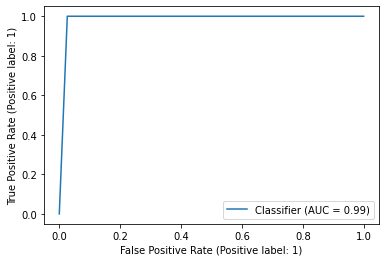

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

In [ ]:
import seaborn as sns

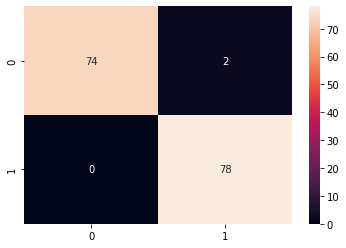

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
prediccion_1=pd.DataFrame(rf_cls.predict(testt),test["id"])

In [ ]:
prediccion_1

,0
id,
822,0
673,1
262,1
568,1
483,1
...,...
757,1
765,0
754,1


In [ ]:
resultados = prediccion_1.reset_index()
resultados.columns = ['id','predicted']
resultados.to_csv('resultados.csv',index=False)